In [58]:
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel(r'final_data.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'final_data.xlsx'

In [59]:
def dealstr(s):
    return s.lower().replace('and', '').replace(',', '').split()

df['OCC_TITLE'].map(dealstr).explode().value_counts()[:10]

workers        10169
other           8778
all             8274
operators       7039
technicians     5036
managers        4268
except          4256
clerks          3728
machine         3660
repairers       3214
Name: OCC_TITLE, dtype: int64

In [60]:
df['title'] = df['OCC_TITLE'].str.lower().replace('and', '').replace(',', '')

titles = list(df['OCC_TITLE'].map(dealstr).explode().value_counts()[:10].index)
titles = [t for t in titles if t not in ['other', 'all', 'except']]
df['title'] = df['title'].apply(
    lambda x:[s for s in titles if s in x][0] 
    if any([s in x for s in titles]) 
    else 'other'
)

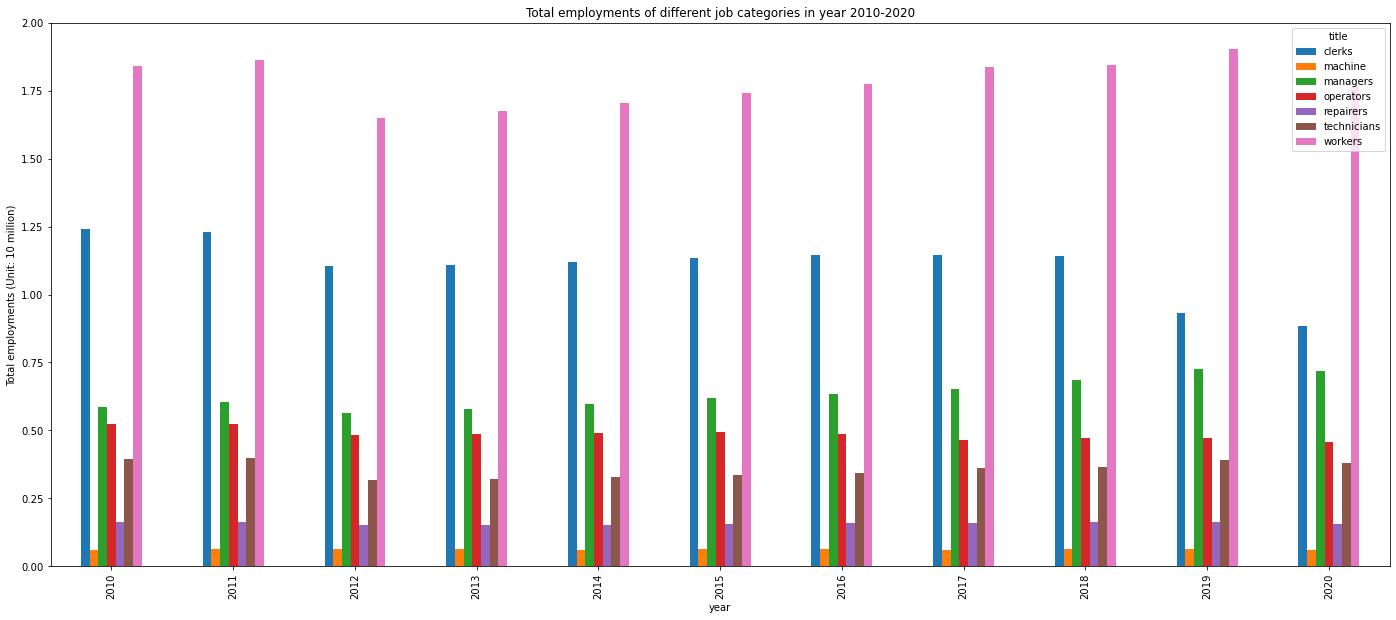

In [61]:
temp = df.groupby(['year', 'title'])['TOT_EMP'].sum().unstack() / 1e7

temp.drop('other', axis=1).plot(
    kind='bar', figsize=(24, 10)
)
plt.ylabel('Total employments (Unit: 10 million)')
plt.title('Total employments of different job categories in year 2010-2020')
plt.savefig('output.png', dpi=500)

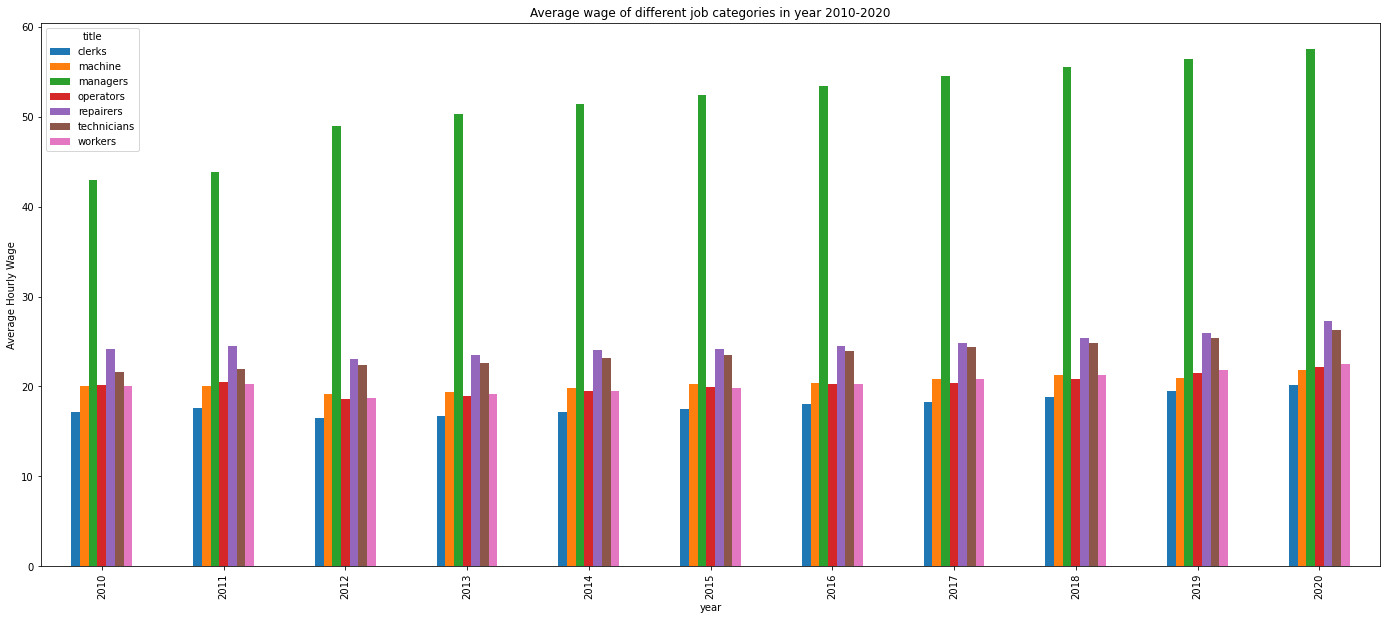

In [49]:
temp = df.groupby(['year', 'title'])['H_MEAN'].mean().unstack() 

temp.drop('other', axis=1).plot(
    kind='bar', figsize=(24, 10)
)
plt.ylabel('Average Hourly Wage')
plt.title('Average wage of different job categories in year 2010-2020')
plt.savefig('output.png', dpi=500)

In [50]:
temp.describe()

title,clerks,machine,managers,operators,other,repairers,technicians,workers
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,17.958590,20.344023,51.585433,20.249713,28.369956,24.670080,23.648222,20.388082
std,1.157152,0.809113,4.793441,1.042024,1.493778,1.178099,1.487918,1.157569
min,16.494182,19.107237,42.992231,18.579662,26.399940,23.018586,21.612039,18.731011
25%,17.170064,19.923433,49.626635,19.686460,27.338180,24.109503,22.509630,19.648070
50%,17.626701,20.241447,52.362874,20.272388,27.933848,24.471300,23.487893,20.220296
75%,18.602507,20.867454,55.036674,20.678022,29.231219,25.112856,24.607148,21.072985
max,20.140331,21.825942,57.579095,22.136613,31.207306,27.240235,26.284216,22.544945


In [51]:
temp.to_excel('sum.xlsx')

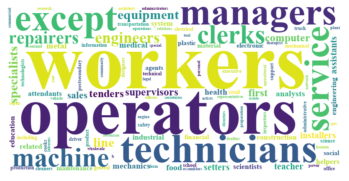

In [52]:
from wordcloud import WordCloud

f = ' '.join(df['OCC_TITLE'].map(dealstr).explode().str.strip().values)
wordcloud = WordCloud( font_path='C:\\windows\\Fonts\\timesbd.ttf',
                    background_color='white', 
                    collocations=False,
                    scale=2).generate(f)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figsize = (10,20)
plt.savefig('pic.png', 
            dpi=1500)
        

In [53]:
a=f.split()

In [54]:
from collections import *
ignore = ['other', 'all', 'except','of']
counts_a = collections.Counter(a) 
for word in ignore:
    if word in counts_a:
        del counts_a[word]

In [55]:
counts = pd.DataFrame(counts_a.most_common(20),
                             columns=['words', 'count'])
print(counts)

          words  count
0       workers  10169
1     operators   7039
2   technicians   5036
3      managers   4268
4        clerks   3728
5       machine   3660
6     repairers   3214
7     engineers   3159
8     equipment   3155
9       service   3049
10  specialists   2953
11  supervisors   2777
12      tenders   2613
13   first-line   2557
14     computer   2459
15        sales   2046
16   installers   1990
17      setters   1982
18   assistants   1941
19     teachers   1896


Text(0.5, 1.0, 'Most Frequent Words in Occupation Titles by Count')

<Figure size 576x576 with 0 Axes>

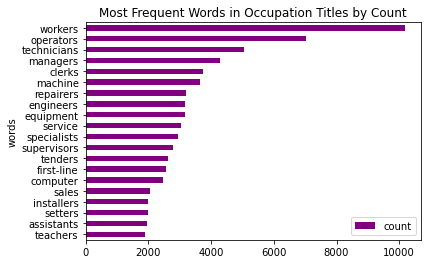

In [56]:
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_title("Most Frequent Words in Occupation Titles by Count")
fig = plt.figure(figsize=(8, 8))
counts.sort_values(by='count').plot.barh(x='words',
                      y='count',  color="purple")

plt.title("Most Frequent Words in Occupation Titles by Count")

In [57]:
plt.show()